In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sort_dataframeby_monthorweek as sd
import plotly.express as px

In [51]:
df = pd.read_csv("data/hotel_bookings.csv")

In [52]:
# Define a general plotting function
def plot_data(data=None, x=None, y=None, hue=None, chart_type="bar", palette="viridis", 
              title="", xlabel="", ylabel="", figsize=(10, 6), rotation=0):
    plt.figure(figsize=figsize)
    
    if chart_type == "bar":
        sns.barplot(x=x, y=y, hue=hue, data=data, palette=palette)
    elif chart_type == "line":
        plt.plot(x, y, marker='o', color=palette)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()


In [122]:
def categorize_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'

In [53]:
# Data Summary and Missing Values
data_summary = df.describe(include='all')
missing_values = df.isnull().sum()
print("Data Summary:")
print(data_summary)
print("Missing Values:")
print(missing_values)


Data Summary:
             hotel is_canceled      lead_time  arrival_date_year  \
count       119390      119390  119390.000000      119390.000000   
unique           2           2            NaN                NaN   
top     City Hotel          no            NaN                NaN   
freq         79330       75166            NaN                NaN   
mean           NaN         NaN     104.011416        2016.156554   
std            NaN         NaN     106.863097           0.707476   
min            NaN         NaN       0.000000        2015.000000   
25%            NaN         NaN      18.000000        2016.000000   
50%            NaN         NaN      69.000000        2016.000000   
75%            NaN         NaN     160.000000        2017.000000   
max            NaN         NaN     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count              119390             119390.000000   
unique                 12                       NaN   
top 

In [54]:

# Impute 'children' column with the median value
df['children'].fillna(df['children'].median(), inplace=True)
# Converting Yes or No column 0 or 1
df.loc[:, 'is_canceled']= df['is_canceled'].map({'yes': 1, 'no': 0})
# Impute 'country' column with the most frequent value
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Explicitly cast 'agent' and 'company' columns to 'object' (string) type
df['agent'] = df['agent'].astype('object')
df['company'] = df['company'].astype('object')

# Impute 'agent' and 'company' columns with 'Unknown' to handle missing values
df['agent'].fillna('Unknown', inplace=True)
df['company'].fillna('Unknown', inplace=True)

# Verifing that missing values have been handled
missing_values_summary = df.isnull().sum()
missing_values_summary[missing_values_summary > 0]  # Should return an empty series if all NaNs are handled
df.isnull().sum()


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

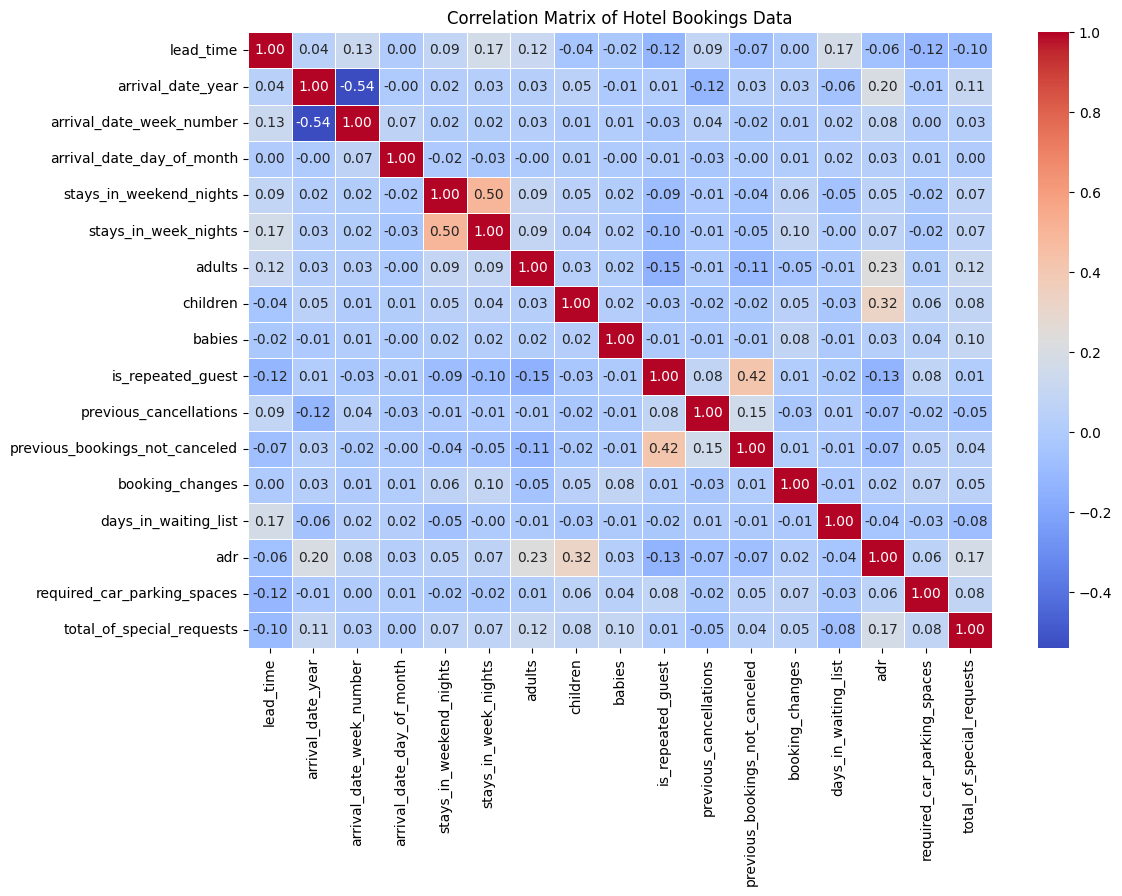

In [55]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Hotel Bookings Data')
plt.show()

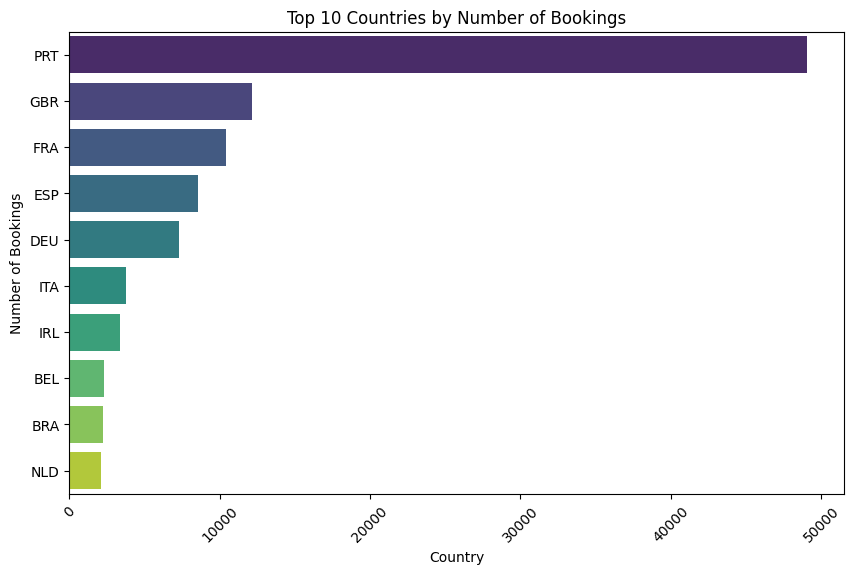

In [56]:
# Top 10 countries by bookings
top_countries = df['country'].value_counts().head(10).reset_index()
plot_data(data=top_countries, x='count', y='country', chart_type="bar", palette="viridis",hue='country',
          title='Top 10 Countries by Number of Bookings', xlabel='Country', ylabel='Number of Bookings', rotation=45)


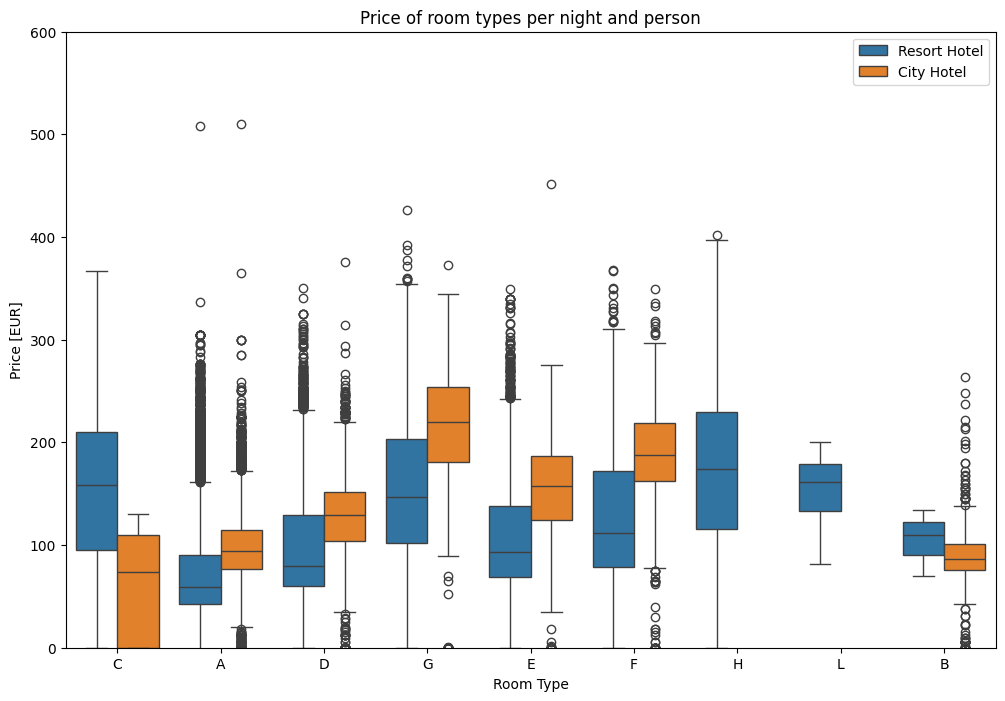

In [57]:
data2 = df[df['is_canceled'] == 0]
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'reserved_room_type',
           y = 'adr', 
           hue = 'hotel',
           data = data2)
plt.title("Price of room types per night and person")
plt.xlabel("Room Type")
plt.ylabel("Price [EUR]")
plt.legend(loc = 'upper right')
plt.ylim(0, 600)
plt.show()

In [58]:
resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
City = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
data_resort = resort[resort['is_canceled'] == 0]
data_city = City[City['is_canceled'] == 0]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final = sd.Sort_Dataframeby_Month(df = final, monthcolumnname = 'month')
px.line(final, x = 'month', y=['price_for_resort', 'price_for_city_hotel'], title ='Room price per night over the month' )

## Cancellation related Graph

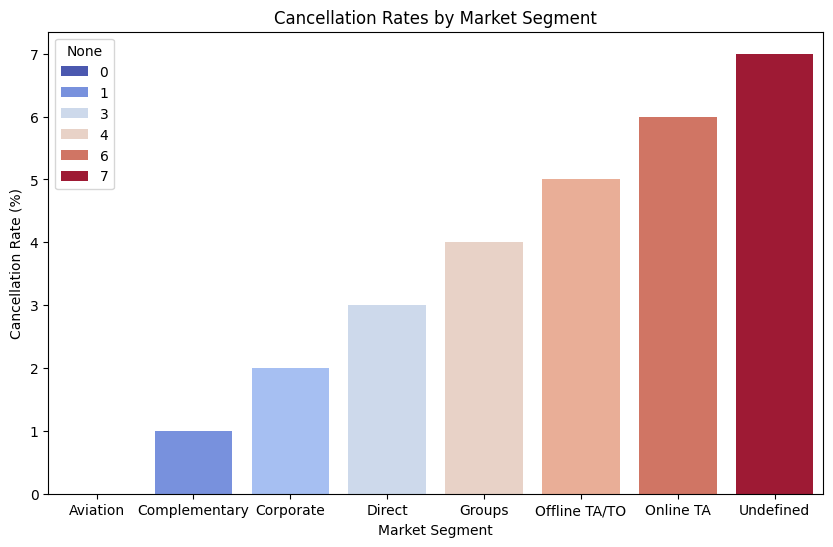

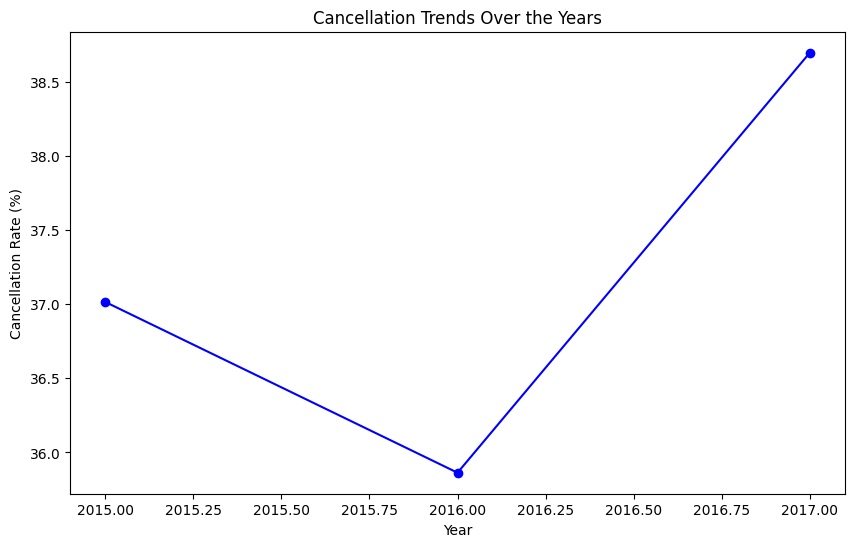

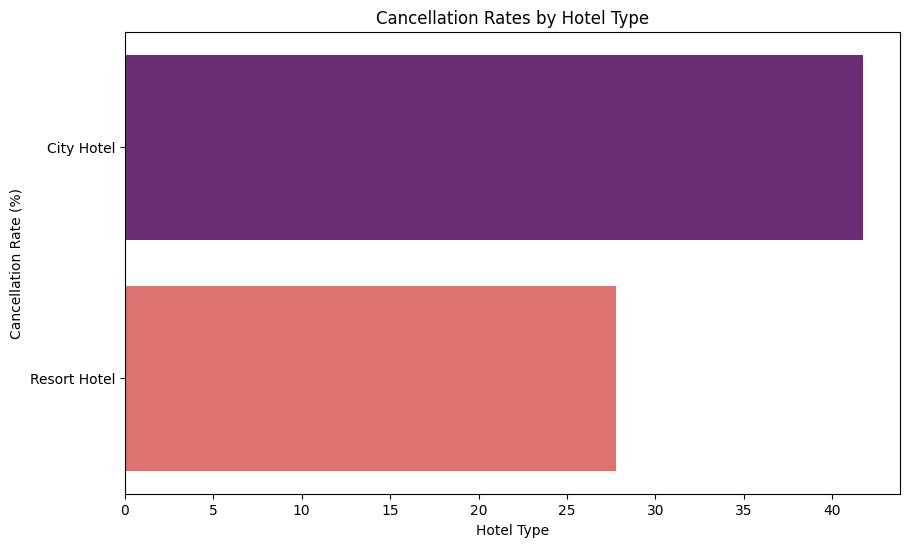

In [76]:

# Cancellation rates by market segment
cancellation_by_segment = df.groupby('market_segment')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate = cancellation_by_segment.loc[:,1] * 100
cancellation_rate = cancellation_rate.reset_index().rename(columns={0: 'cancellation_rate'})
plot_data(data=cancellation_rate, x='market_segment', y=cancellation_rate.index, chart_type="bar", palette="coolwarm",hue=cancellation_rate.index,
          title='Cancellation Rates by Market Segment', xlabel='Market Segment', ylabel='Cancellation Rate (%)')

# Cancellation trends over the years
cancellation_trends = df.groupby('arrival_date_year')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)
cancellation_trend_over_years = cancellation_trends.loc[:,1] * 100
plot_data(x=cancellation_trend_over_years.index, y=cancellation_trend_over_years.values, chart_type="line", palette="b", 
          title='Cancellation Trends Over the Years', xlabel='Year', ylabel='Cancellation Rate (%)')

# Cancellation by hotel type
cancellation_by_hotel_type = df.groupby('hotel')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate_hotel_type = cancellation_by_hotel_type.loc[:,1] * 100
plot_data( x=cancellation_rate_hotel_type.values, y=cancellation_rate_hotel_type.index, chart_type="bar", palette="magma", hue=cancellation_rate_hotel_type.index,
          title='Cancellation Rates by Hotel Type', xlabel='Hotel Type', ylabel='Cancellation Rate (%)')


## Revenue

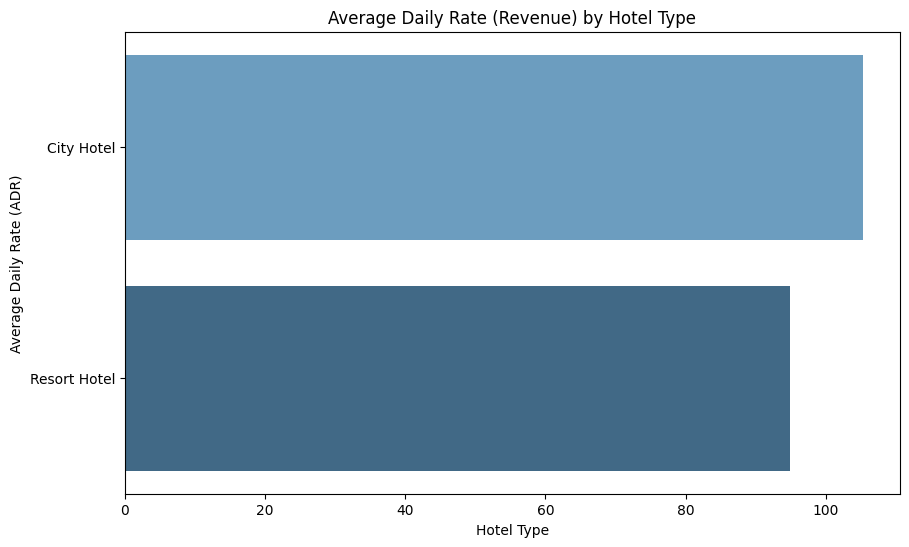

In [79]:
# Revenue differences by hotel type
revenue_by_hotel_type = df.groupby('hotel')['adr'].mean()
plot_data(x=revenue_by_hotel_type.values, y=revenue_by_hotel_type.index, chart_type="bar", palette="Blues_d", hue=revenue_by_hotel_type.index,
          title='Average Daily Rate (Revenue) by Hotel Type', xlabel='Hotel Type', ylabel='Average Daily Rate (ADR)')

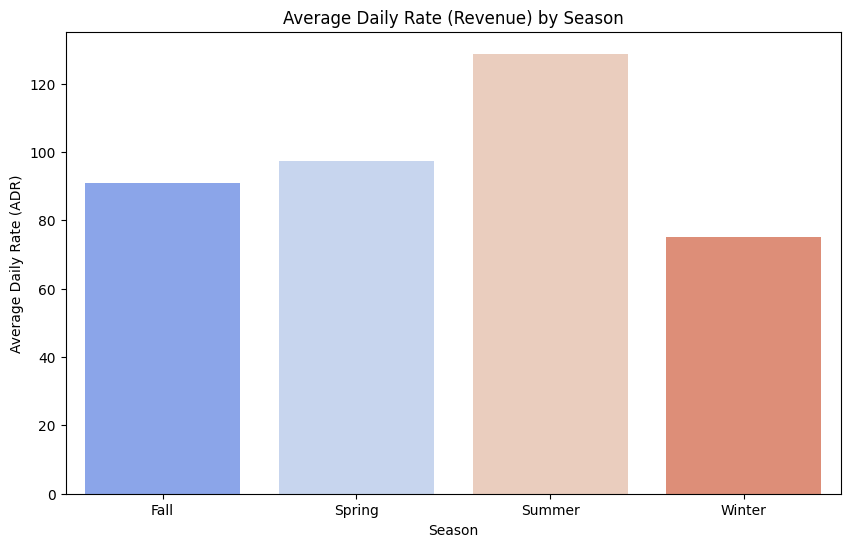

In [128]:
df['season'] = df['arrival_date_month'].apply(categorize_season)

# Group the data by season and calculate the average ADR (revenue) for each season
revenue_by_season = df.groupby('season')['adr'].mean().reset_index()

# Plot the revenue differences by season
plot_data(data=revenue_by_season, x='season', y='adr', chart_type="bar", palette="coolwarm", hue=revenue_by_season['season'],
          title='Average Daily Rate (Revenue) by Season', xlabel='Season', ylabel='Average Daily Rate (ADR)')

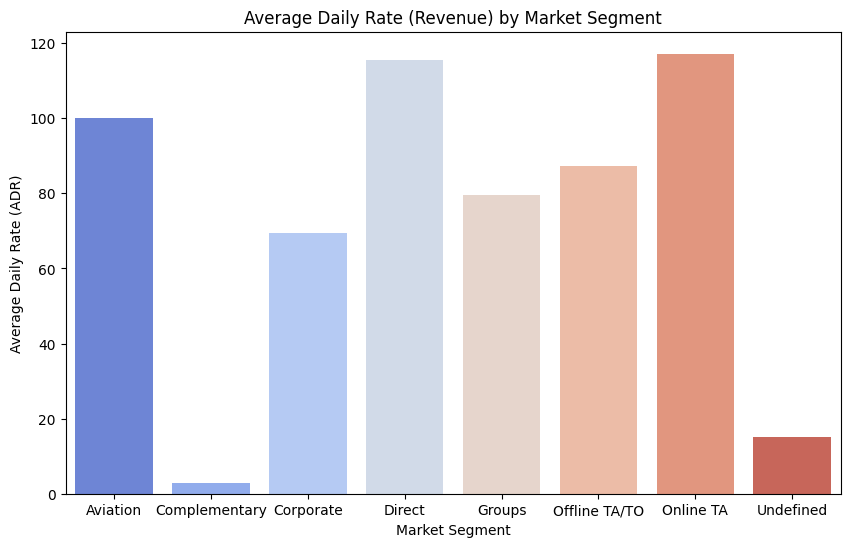

In [130]:
revenue_by_segment = df.groupby('market_segment')['adr'].mean().reset_index()
plot_data(data=revenue_by_segment, x='market_segment', y='adr', chart_type="bar", palette="coolwarm",hue=revenue_by_segment['market_segment'],
          title='Average Daily Rate (Revenue) by Market Segment', xlabel='Market Segment', ylabel='Average Daily Rate (ADR)')

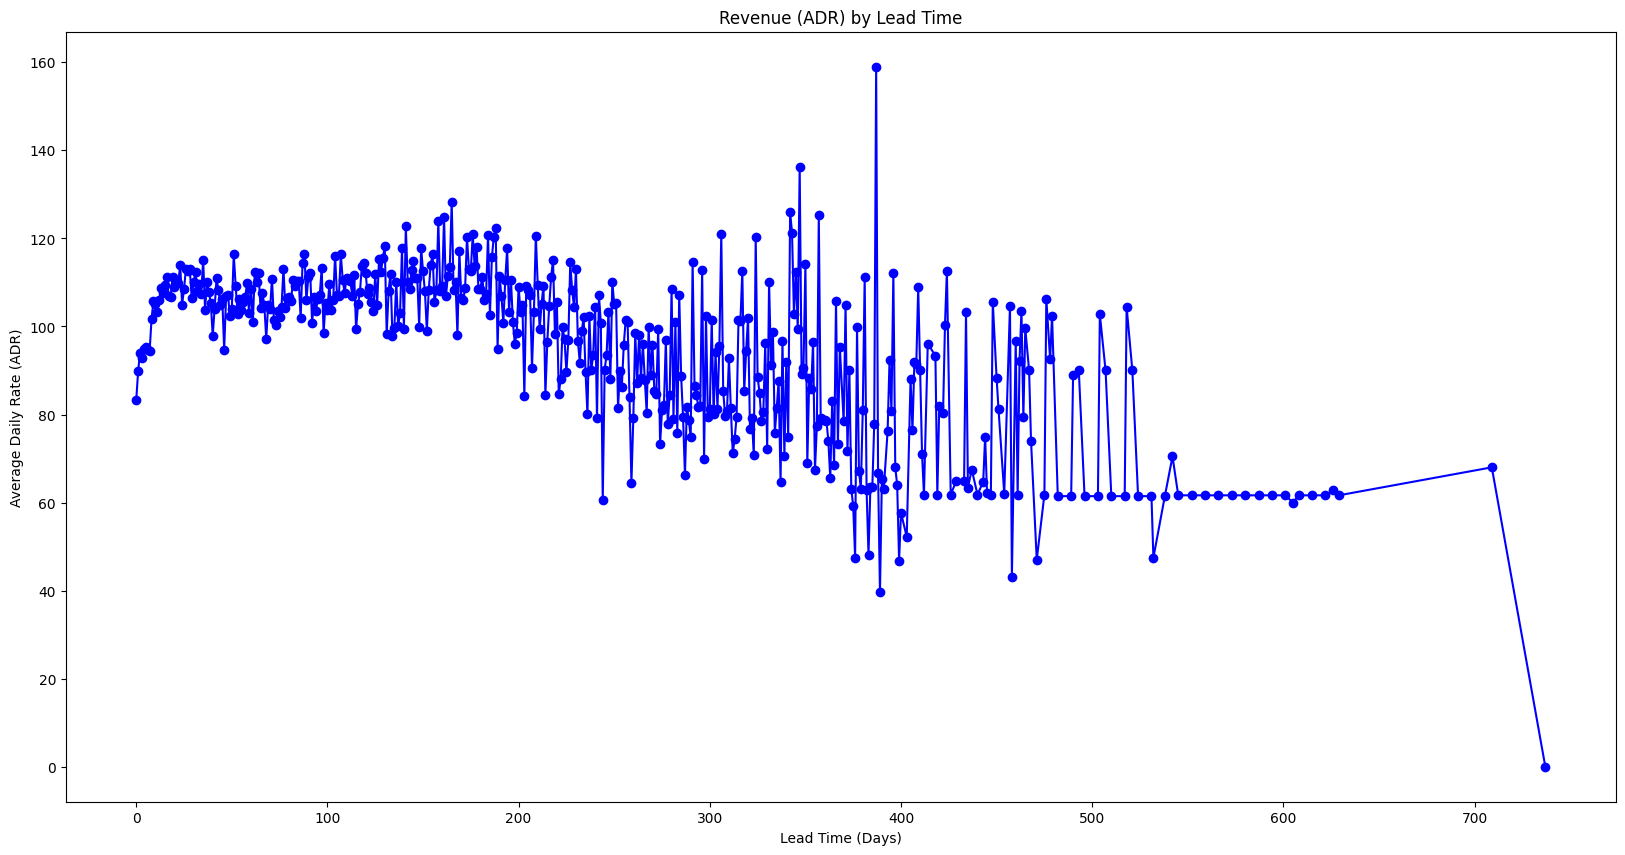

In [135]:
revenue_by_lead_time = df.groupby('lead_time')['adr'].mean()
print()
# Plot the revenue trends by lead time
plot_data(data=revenue_by_lead_time, x=revenue_by_lead_time.index, y=revenue_by_lead_time.values, chart_type="line", palette="b",figsize=(20,10),
          title='Revenue (ADR) by Lead Time', xlabel='Lead Time (Days)', ylabel='Average Daily Rate (ADR)')

## Cancellation

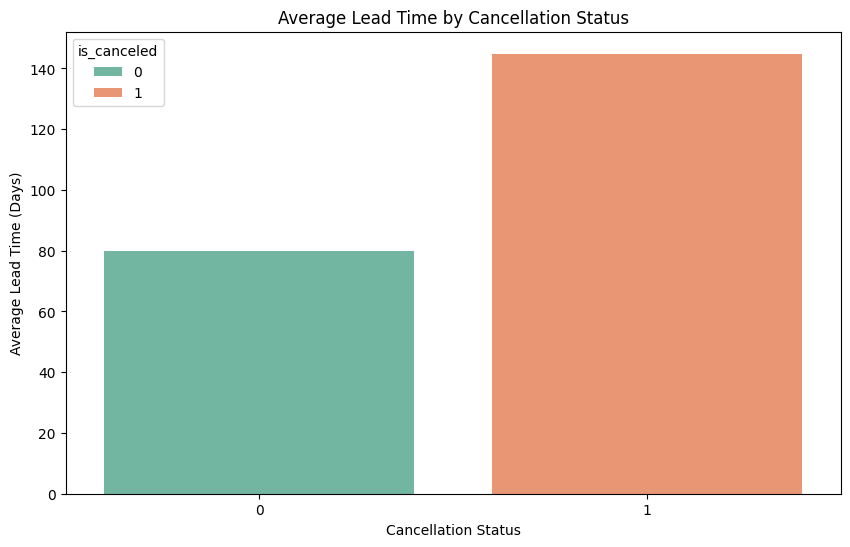

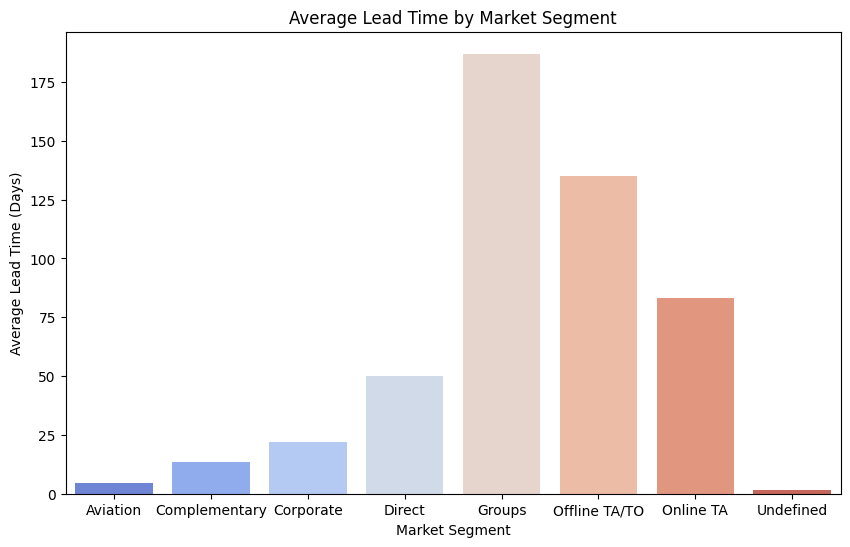

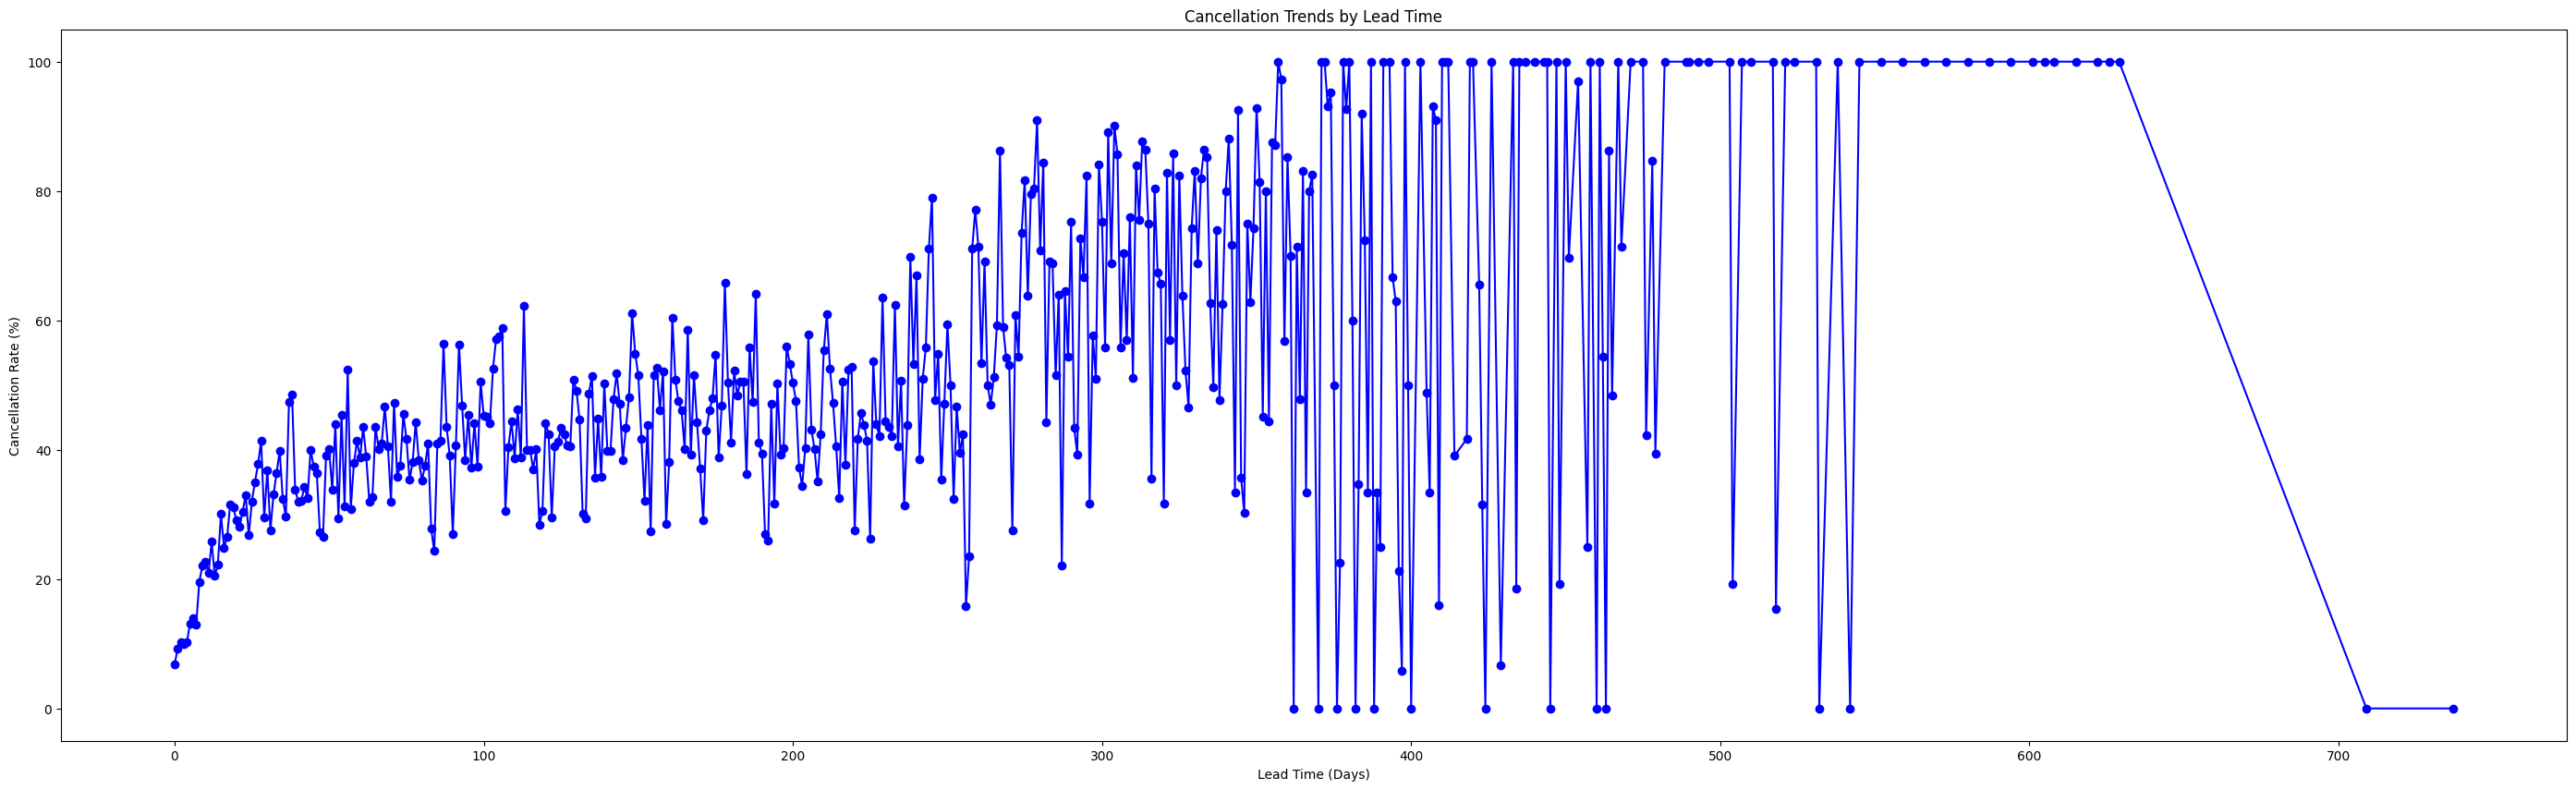

In [97]:
# Lead time and cancellation relationship
df['is_canceled_numeric'] = df['is_canceled']
lead_time_cancellation = df.groupby('is_canceled')['lead_time'].mean().reset_index()
plot_data(data=lead_time_cancellation, x='is_canceled', y='lead_time', chart_type="bar", palette="Set2", hue=lead_time_cancellation.is_canceled,
          title='Average Lead Time by Cancellation Status', xlabel='Cancellation Status', ylabel='Average Lead Time (Days)')

# Lead time by market segment
lead_time_by_segment = df.groupby('market_segment')['lead_time'].mean().reset_index()
plot_data(data=lead_time_by_segment, x='market_segment', y='lead_time', chart_type="bar", palette="coolwarm",hue=lead_time_by_segment.market_segment, 
          title='Average Lead Time by Market Segment', xlabel='Market Segment', ylabel='Average Lead Time (Days)')

# Cancellation trends by lead time
cancellation_trends_by_lead_time = df.groupby('lead_time')['is_canceled_numeric'].mean() * 100
plot_data(x=cancellation_trends_by_lead_time.index, y=cancellation_trends_by_lead_time.values, chart_type="line", palette="b", 
          title='Cancellation Trends by Lead Time', xlabel='Lead Time (Days)', ylabel='Cancellation Rate (%)', figsize=(35, 10))


## Patterns By Season

Index(['Summer', 'Spring', 'Fall', 'Winter'], dtype='object', name='season')


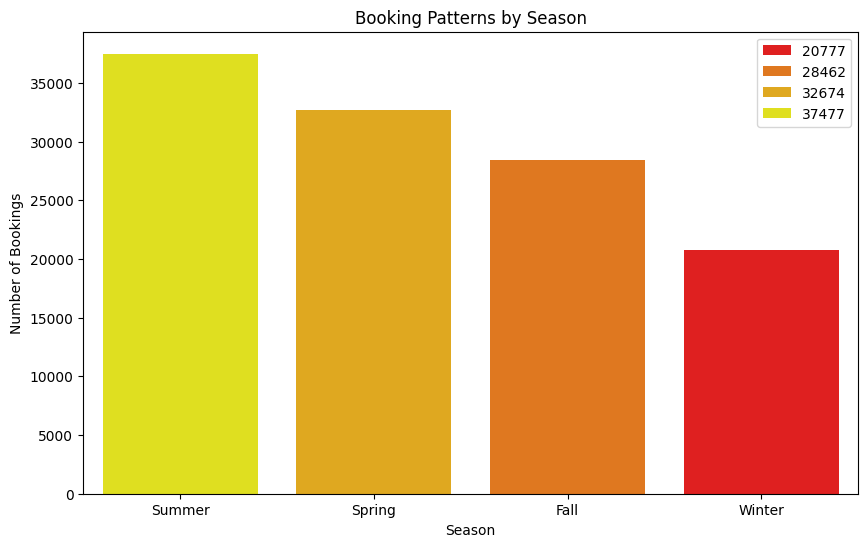

In [108]:
df['season'] = df.loc[:,'arrival_date_month'].apply(categorize_season)
bookings_by_season = df['season'].value_counts()
print(bookings_by_season.index)
plot_data(x=bookings_by_season.index, y=bookings_by_season.values, chart_type="bar", palette='autumn',hue = bookings_by_season.values,
          title='Booking Patterns by Season', xlabel='Season', ylabel='Number of Bookings')


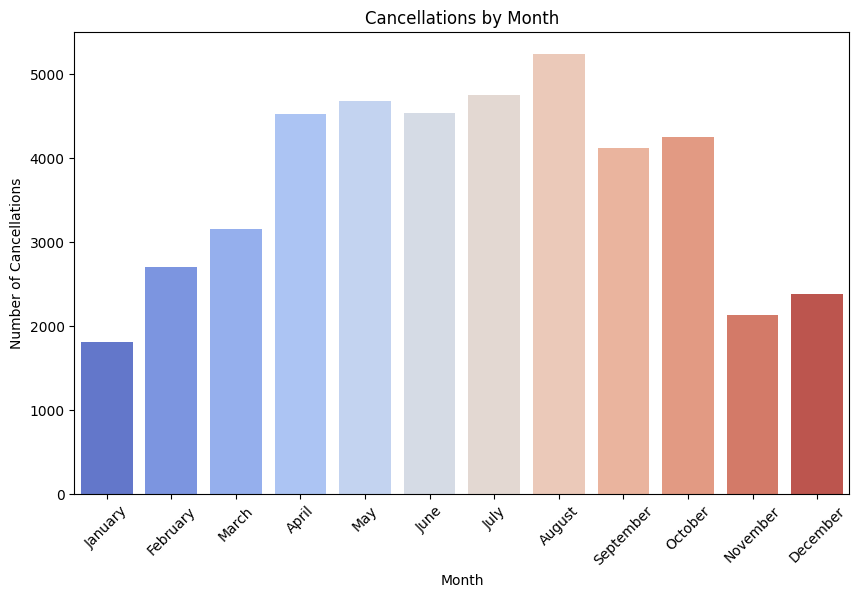

In [115]:
# Cancellations by month
cancellations_by_month = df[df['is_canceled'] == 1]['arrival_date_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plot_data( x=cancellations_by_month.index, y=cancellations_by_month.values, chart_type="bar", palette='coolwarm', hue=cancellations_by_month.index,
          title='Cancellations by Month', xlabel='Month', ylabel='Number of Cancellations', rotation=45)


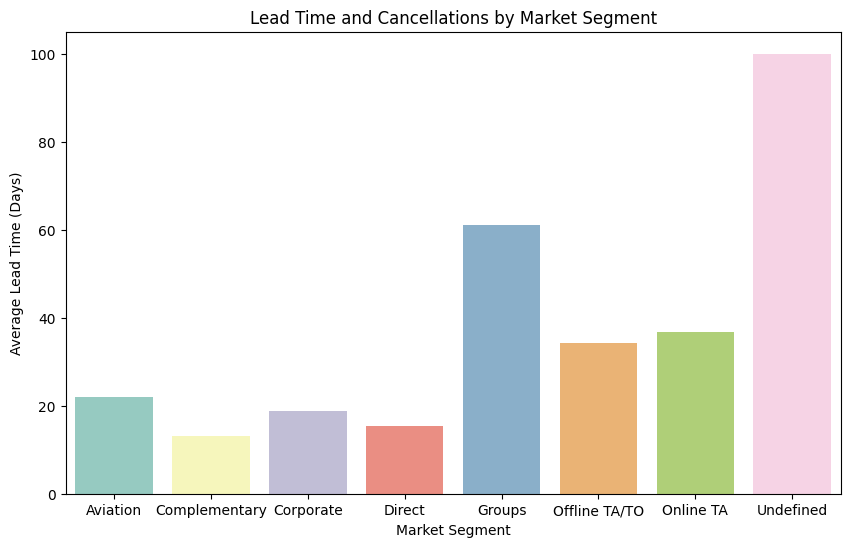

In [121]:
cancellation_by_segment = df.groupby('market_segment')['is_canceled'].value_counts(normalize=True).unstack().fillna(0)
cancellation_rate = cancellation_by_segment.loc[:, 1] * 100
plot_data( x=cancellation_rate.index, y=cancellation_rate.values, chart_type="bar", palette="Set3",hue=cancellation_rate.index, 
          title='Lead Time and Cancellations by Market Segment', xlabel='Market Segment', ylabel='Average Lead Time (Days)')